<a href="https://colab.research.google.com/github/piyu18/Learn_TensorFlow/blob/main/TensorFlow_Day02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# Get information about the GPU
!nvidia-smi

Wed Oct 26 21:00:27 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Basic Tensor Operations
`+`,`-`,`*`,`/`

In [3]:
# Add value to tensor using addition operator
tensor = tf.constant([[[1,2,3],
                                [4,5,6],
                                [6,7,8]]])
tensor + 7

<tf.Tensor: shape=(1, 3, 3), dtype=int32, numpy=
array([[[ 8,  9, 10],
        [11, 12, 13],
        [13, 14, 15]]], dtype=int32)>

In [4]:
# Multiplication
tensor * 10

<tf.Tensor: shape=(1, 3, 3), dtype=int32, numpy=
array([[[10, 20, 30],
        [40, 50, 60],
        [60, 70, 80]]], dtype=int32)>

In [5]:
# Substraction
tensor - 10

<tf.Tensor: shape=(1, 3, 3), dtype=int32, numpy=
array([[[-9, -8, -7],
        [-6, -5, -4],
        [-4, -3, -2]]], dtype=int32)>

In [6]:
# Division
tensor / 2

<tf.Tensor: shape=(1, 3, 3), dtype=float64, numpy=
array([[[0.5, 1. , 1.5],
        [2. , 2.5, 3. ],
        [3. , 3.5, 4. ]]])>

In [7]:
# Built in function for multiplication tf.multiply()/tf.math.multiply()
tf.multiply(tensor,10)

<tf.Tensor: shape=(1, 3, 3), dtype=int32, numpy=
array([[[10, 20, 30],
        [40, 50, 60],
        [60, 70, 80]]], dtype=int32)>

In [8]:
# Built in function for addition tf.add()/tf.math.add()
tf.add(tensor, 2)

<tf.Tensor: shape=(1, 3, 3), dtype=int32, numpy=
array([[[ 3,  4,  5],
        [ 6,  7,  8],
        [ 8,  9, 10]]], dtype=int32)>

### Matrix Multiplication
Matrix Multiplication Rule:
1. Inner dimension should match.
  * (3,5) @ (3,5) will not work
  * (3,5) @ (5,3) will work
2. The reulting matrix should have shape of outer dimension.
  * (3,5) @ (5,3) -> (3,3)
  * (5,3) @ (3,5) -> (5,5)

        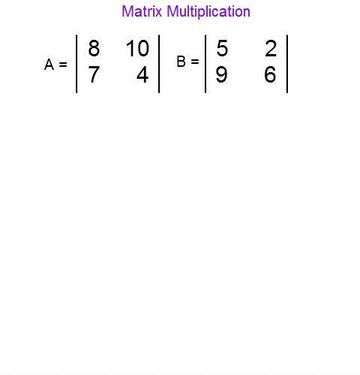

In [9]:
# Matrix multiplication in TensorFlow tf.linalg.matmul(), we can ignore the intermediate part and write it as tf.matmul()
print(tensor)
tf.matmul(tensor, tensor)


tf.Tensor(
[[[1 2 3]
  [4 5 6]
  [6 7 8]]], shape=(1, 3, 3), dtype=int32)


<tf.Tensor: shape=(1, 3, 3), dtype=int32, numpy=
array([[[ 27,  33,  39],
        [ 60,  75,  90],
        [ 82, 103, 124]]], dtype=int32)>

In [10]:
# Matrix multiplication using Python (@)
tensor @ tensor

<tf.Tensor: shape=(1, 3, 3), dtype=int32, numpy=
array([[[ 27,  33,  39],
        [ 60,  75,  90],
        [ 82, 103, 124]]], dtype=int32)>

In [11]:
# Create (3, 2) tensor
X = tf.constant([[1, 2],
                 [3, 4],
                 [5, 6]])

# Create another (3, 2) tensor
Y = tf.constant([[7, 8],
                 [9, 10],
                 [11, 12]])
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [12]:
# Let's try to multiply X and Y
#X @ Y
#tf.matmul(X,Y)

In [13]:
# We will get error if we try to multiply X and Y as the rule mentioned above is not fulfilled. Let's try to change the shape of Y to (2,3)
Y1 = tf.transpose(Y) # tf.transpose() will swap the order of the axes
Y1

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  9, 11],
       [ 8, 10, 12]], dtype=int32)>

In [14]:
%%time
X @ Y1

CPU times: user 408 µs, sys: 0 ns, total: 408 µs
Wall time: 418 µs


<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [15]:
# With GPU connected tf.matmul() is faster then python matrix multiplication
%%time
tf.matmul(X, Y1)

CPU times: user 253 µs, sys: 59 µs, total: 312 µs
Wall time: 798 µs


<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [16]:
# Change the shape with tf.reshape()
X1 = tf.reshape(X, shape = (2,3))
X1

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [17]:
Y

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 7,  8],
       [ 9, 10],
       [11, 12]], dtype=int32)>

In [18]:
X1 @ Y

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 58,  64],
       [139, 154]], dtype=int32)>

In [19]:
tf.matmul(tf.transpose(X), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [20]:
# We can achieve same result with the parameter
tf.matmul(a=X, b=Y, transpose_a=True)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

### Changing the datatype of tensor
Sometimes we want to alter default datatype, especially when less precision is required `tf.cast()`

In [21]:
# Create a tensor with default datatype (float32)
A = tf.constant([1.2, 1.4])

# Create a tensor with default datatype (int32)
B = tf.constant([1, 3])

A, B

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.2, 1.4], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 3], dtype=int32)>)

In [22]:
# Change float32 to float16
A = tf.cast(A, dtype=tf.float16)
A

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.2, 1.4], dtype=float16)>

In [23]:
# Change int32 to int16
B = tf.cast(B, dtype=tf.int16)
B

<tf.Tensor: shape=(2,), dtype=int16, numpy=array([1, 3], dtype=int16)>

In [24]:
# Change int16 to float32
C = tf.cast(B, dtype=tf.float32)
C

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 3.], dtype=float32)>

### Getting the Absolute Value
`tf.abs()` Computes the absolute value of a tensor.

In [25]:
D = tf.constant([-3, -7])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([-3, -7], dtype=int32)>

In [26]:
# Get the absolute value
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 7], dtype=int32)>

### Finding min, max, mean and sum of tensor
  * `tf.reduce_min()` -> find the minimum value in a tensor
  * `tf.reduce_max()` -> find the maximum value in a tensor, can be used to get the highest prediction probability
  * `tf.reduce_mean()` -> find the mean of all elements of a tensor
  * `tf.reduce_sum()` -> find the sum of all elements of a tensor

In [27]:
# Create a tensor with 20 random values between 0 and 50
import numpy as np
X1 = tf.constant(np.random.randint(low=0, high=50, size=20))
X1

<tf.Tensor: shape=(20,), dtype=int64, numpy=
array([10, 17,  1, 27, 17,  1, 20, 32,  6, 36, 28,  6, 41, 25,  3, 38, 30,
       17, 11, 46])>

In [28]:
# Find the minimum
tf.reduce_min(X1)

<tf.Tensor: shape=(), dtype=int64, numpy=1>

In [29]:
# Find the max
tf.reduce_max(X1)

<tf.Tensor: shape=(), dtype=int64, numpy=46>

In [30]:
# Find the mean
tf.reduce_mean(X1)

<tf.Tensor: shape=(), dtype=int64, numpy=20>

In [31]:
# Find the sum
tf.reduce_sum(X1)

<tf.Tensor: shape=(), dtype=int64, numpy=412>

### Finding positional max and min
  * `tf.argmax()` -> Argmax is most commonly used in machine learning for finding the class with the largest predicted probability. Returns the index with the largest value across axes of a tensor.
  * `tf.argmin()` ->  Returns the index with the smallest value across axes of a tensor.

In [32]:
# Create a tensor with 20 values b/w 0 and 1
X2 = tf.constant(np.random.random(20))
X2

<tf.Tensor: shape=(20,), dtype=float64, numpy=
array([0.89630529, 0.28655941, 0.87839208, 0.544616  , 0.47393212,
       0.67901376, 0.47824932, 0.18727845, 0.59439678, 0.2485176 ,
       0.51527345, 0.62735345, 0.5067493 , 0.69126308, 0.36821627,
       0.73642537, 0.59088978, 0.17469831, 0.8092668 , 0.5261132 ])>

In [33]:
# Find the max element position
print(tf.argmax(X2))
print(tf.argmax(X2).numpy())

tf.Tensor(0, shape=(), dtype=int64)
0


In [34]:
# Find the min element position
tf.argmin(X2).numpy()

17

### Calculate square, sqrt, exp and log of tensor
  * `tf.square()` -> Computes square of x element-wise.
  * `tf.sqrt()` -> Computes element-wise square root of the input tensor.
  * `tf.math.log()` -> Computes natural logarithm of x element-wise.
  * `tf.exp()` -> Computes exponential of x element-wise.

In [35]:
# Create a tensor
X2 = tf.constant(np.arange(1, 5))
X2

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([1, 2, 3, 4])>

In [36]:
# Square of tensor(element wise)
tf.square(X2)

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([ 1,  4,  9, 16])>

In [37]:
# sqrt of tensor(element-wise), it will give error as the input should be non-int value
tf.sqrt(X2)

InvalidArgumentError: ignored

In [38]:
# Change the dtype of X2 to float32
X3 = tf.cast(X2, dtype=tf.float32)
X3

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 2., 3., 4.], dtype=float32)>

In [39]:
tf.sqrt(X3)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1.       , 1.4142135, 1.7320508, 2.       ], dtype=float32)>

In [40]:
# Find the log, input should be non-int
tf.math.log(X3)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.       , 0.6931472, 1.0986123, 1.3862944], dtype=float32)>

In [41]:
# Find the exponential, input should be non-int
tf.exp(X3)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 2.7182817,  7.389056 , 20.085537 , 54.59815  ], dtype=float32)>

In [42]:
# Exp for complex number
tf.exp(tf.constant(1+1j))

<tf.Tensor: shape=(), dtype=complex128, numpy=(1.4686939399158851+2.2873552871788423j)>

### One-hot encoding
`tf.one_hot()` -> Returns a one-hot tensor.

If the `input` indices is rank `N`, the output will have rank `N+1`.

If indices is a `scalar` the output shape will be a vector of length `depth`

If indices is a `vector` of length `features`, the output shape will be:
  * features x depth if axis == -1
  * depth x features if axis == 0

In [43]:
# Create a list of indices
indices = [0, 1, 2, 3]

# One-hot encoding
tf.one_hot(indices, depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [44]:
tf.one_hot(indices, depth=4, on_value=5.0, off_value=1.0)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[5., 1., 1., 1.],
       [1., 5., 1., 1.],
       [1., 1., 5., 1.],
       [1., 1., 1., 5.]], dtype=float32)>

In [45]:
indices = [0, 2, -1, 1]
tf.one_hot(indices, depth=3, on_value=5.0, off_value=0.0,axis=-1)

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[5., 0., 0.],
       [0., 0., 5.],
       [0., 0., 0.],
       [0., 5., 0.]], dtype=float32)>

In [46]:
indices = [[0, 2], [1, -1]] 
depth = 3 
tf.one_hot(indices, depth, on_value=5.0, off_value=0.0,axis=-1)

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[5., 0., 0.],
        [0., 0., 5.]],

       [[0., 5., 0.],
        [0., 0., 0.]]], dtype=float32)>

In [47]:
indices = [[0, 2], [1, -1]] 
depth = 3 
tf.one_hot(indices, depth, on_value=5.0, off_value=0.0,axis=0)

<tf.Tensor: shape=(3, 2, 2), dtype=float32, numpy=
array([[[5., 0.],
        [0., 0.]],

       [[0., 0.],
        [5., 0.]],

       [[0., 5.],
        [0., 0.]]], dtype=float32)>